# 使用Scikit-Learn 完成預測
### Scikit-Learn在三個面向提供支援。
1. 獲取資料:***klearn.datasets***
2. 掌握資料:***sklearn.preprocessing*** 
3. 機器學習:***sklearn Estimator API*** 

獲取資料的方式有很多種（包含檔案、資料庫、網路爬蟲、Kaggle Datasets等），<br>
其中最簡單的方式是從Sklearn import 內建的資料庫。由於其特性隨手可得且不用下載，所以我們通常叫他**玩具資料**：

# 基本架構

* 讀取資料&pre-processing
* 切分訓練集與測試集 
* 模型配適
* 預測 
* 評估(計算成績可能是誤差值或正確率或..)


In [1]:
%matplotlib inline

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 讀取Iris資料集與資料前處理

Iris Flowers 資料集

我們在這個項目中使用 Iris Data Set，這個資料集中的每個樣本有4個特徵，1個類別。該資料集1中的樣本類別數為3類，每類樣本數目為50個，總共150個樣本。

屬性資訊：

    花萼長度 sepal length(cm)
    花萼寬度 sepal width(cm)
    花瓣長度 petal length(cm)
    花瓣寬度 petal width(cm)
    類別：
        Iris Setosa
        Iris Versicolour
        Iris Virginica

樣本特徵資料是數值型的，而且單位都相同（釐米）。

![Iris Flowers](images/iris_data.PNG)


In [2]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* 印出iris的key值與檔案位置
* 查看前10筆資料
* 查看資料型別
* 印出標註的樣本類別資料

In [8]:
print(iris.keys())

print(iris['filename'])

print(iris.data[0:10])

print(type(iris.data))

print(iris.target)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
iris.csv
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [11]:
# we only take the first two features. 
X = iris.data[:, :2]
print(X.shape)

Y=iris.target
print(Y.shape)

(150, 2)
(150,)


In [12]:
#以下是組成 pandas DataFrame (也可以不用這種做)
x = pd.DataFrame(iris.data, columns=iris['feature_names']) #加column名稱
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [17]:
print('target_names: '+str(iris['target_names']))

target_names: ['setosa' 'versicolor' 'virginica']


In [21]:
#建立Target欄位與資料
y = pd.DataFrame(iris['target'], columns=['target']) #加column名稱
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [23]:
#合併資料特徵欄位與目標欄位
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)', 'petal length (cm)', 'target']]#取目標欄位
iris_data.head(10)


,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
5,5.4,1.7,0
6,4.6,1.4,0
7,5.0,1.5,0
8,4.4,1.4,0
9,4.9,1.5,0


In [27]:
#只選擇目標為0與1的資料
iris_data = iris_data[iris_data['target'].isin([0,1])]#只想看target為0到1之間的
iris_data

#所有資料數量
#print(iris['data'].size/len(iris['feature_names']))

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


## 切分訓練集與測試集
> train_test_split()

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(iris_data[['sepal length (cm)', 'petal length (cm)']],iris_data[['target']],test_size=0.3)

In [35]:
X_train.head()
X_train.shape

(70, 2)

In [49]:
X_test.head()
X_test.shape

(30, 2)

In [48]:
Y_train.head()


,target
13,0
74,1
92,1
6,0
86,1


In [47]:
Y_test.head()


,target
49,0
8,0
88,1
70,1
36,0


# Appendix 

>normalization和standardization是差不多的<br>
都是把數據進行前處理，從而使數值都落入到統一的數值範圍，從而在建模過程中，各個特徵量沒差別對待。<br> 
* normalization一般是把數據限定在需要的範圍，比如一般都是【0，1】，從而消除了數據量綱對建模的影響。<br> 
* standardization 一般是指將數據正態化，使平均值0方差為1.<br> 

因此normalization和standardization 是針對數據而言的，消除一些數值差異帶來的特種重要性偏見。<br>
經過歸一化的數據，能加快訓練速度，促進算法的收斂。

### Standardization (z-score)
    to compute the mean and standard deviation on a training set so as to be able to later reapply the same transformation on the testing set. 

In [53]:
def norm_stats(dfs):
    minimum = np.min(dfs)
    maximum = np.max(dfs)
    mu = np.mean(dfs)
    sigma = np.std(dfs)
    return (minimum, maximum, mu, sigma)


def z_score(col, stats):
    m, M, mu, s = stats
    df = pd.DataFrame()
    for c in col.columns:
        df[c] = (col[c]-mu[c])/s[c]
    return df

In [54]:
stats = norm_stats(X_test)
arr_x_test = np.array(z_score(X_test, stats))
arr_x_test

#arr_y_train = np.array(Y_train)
#arr_x_train[:5]

/Users/a111/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/a111/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/a111/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[-0.74579805, -0.94441635],
       [-1.82840812, -0.94441635],
       [ 0.33681202,  0.88567275],
       [ 0.87811706,  1.3601403 ],
       [ 0.15637701, -1.01219743],
       [-1.10666807, -0.94441635],
       [ 1.59985711,  1.08901598],
       [-0.38492803, -0.94441635],
       [-0.74579805, -1.07997851],
       [ 0.51724703,  0.95345383],
       [-0.92623306, -0.94441635],
       [ 0.69768205,  0.75011059],
       [ 1.96072713,  1.22457814],
       [-1.82840812, -1.01219743],
       [-0.56536304, -0.87663527],
       [ 0.15637701,  0.61454844],
       [-1.10666807, -0.94441635],
       [-0.92623306, -0.87663527],
       [ 1.23898708,  1.29235922],
       [ 1.05855207,  0.81789167],
       [-0.56536304, -0.60551096],
       [ 1.05855207,  1.15679706],
       [ 1.05855207,  1.15679706],
       [-0.74579805, -0.8088542 ],
       [-0.38492803, -0.87663527],
       [ 0.87811706,  0.95345383],
       [-0.92623306, -0.94441635],
       [-0.56536304, -0.94441635],
       [ 0.69768205,

## use sklearn

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)  #Compute the statistics to be used for later scaling.
print(sc.mean_)  #mean
print(sc.scale_) #standard deviation

[5.49571429 2.89      ]
[0.66984768 1.42689974]


In [61]:
#transform: (x-u)/std.
X_train_std = sc.transform(X_train)
X_train_std[:10]

array([[-2.00884313, -1.14775958],
       [ 1.78029212,  1.02123491],
       [ 0.69768205,  0.81789167],
       [-1.4675381 , -0.94441635],
       [ 2.32159715,  1.29235922],
       [ 0.51724703,  0.47898628],
       [-0.56536304,  0.14008089],
       [ 0.33681202,  0.95345383],
       [-0.74579805, -0.8088542 ],
       [-0.74579805,  0.34342413]])

The scaler instance can then be used on new data to transform it the same way it did on the training set:

In [60]:
X_test_std = sc.transform(X_test)
print(X_test_std[:10])

[[-0.74579805 -0.94441635]
 [-1.82840812 -0.94441635]
 [ 0.33681202  0.88567275]
 [ 0.87811706  1.3601403 ]
 [ 0.15637701 -1.01219743]
 [-1.10666807 -0.94441635]
 [ 1.59985711  1.08901598]
 [-0.38492803 -0.94441635]
 [-0.74579805 -1.07997851]
 [ 0.51724703  0.95345383]]


you can also use fit_transform method (i.e., fit and then transform)    

In [58]:
X_train_std = sc.fit_transform(X_train)  
X_test_std = sc.fit_transform(X_test)
print(X_test_std[:10])


[[-0.74579805 -0.94441635]
 [-1.82840812 -0.94441635]
 [ 0.33681202  0.88567275]
 [ 0.87811706  1.3601403 ]
 [ 0.15637701 -1.01219743]
 [-1.10666807 -0.94441635]
 [ 1.59985711  1.08901598]
 [-0.38492803 -0.94441635]
 [-0.74579805 -1.07997851]
 [ 0.51724703  0.95345383]]


In [63]:
print('mean of X_train_std:',np.round(X_train_std.mean(),4))
print('std of X_train_std:',X_train_std.std())

mean of X_train_std: 0.1071
std of X_train_std: 1.0953717820129187


## Min-Max Normaliaztion
    Transforms features by scaling each feature to a given range.
    The transformation is given by:

    X' = X - X.min(axis=0) / ((X.max(axis=0) - X.min(axis=0))
    X -> N 維資料
    


49.71288211959566
30.180685837174355


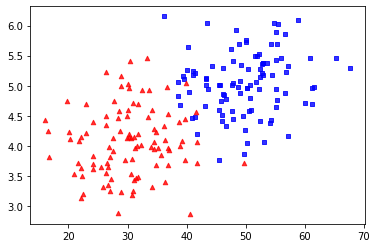

In [64]:
x1 = np.random.normal(50, 6, 100)  # np.random.normal(mu,sigma,size))
y1 = np.random.normal(5, 0.5, 100)

x2 = np.random.normal(30,6,100)
y2 = np.random.normal(4,0.5,100)
plt.scatter(x1,y1,c='b',marker='s',s=20,alpha=0.8)
plt.scatter(x2,y2,c='r', marker='^', s=20, alpha=0.8)

print(np.sum(x1)/len(x1))
print(np.sum(x2)/len(x2))

In [65]:
x_val = np.concatenate((x1,x2))
y_val = np.concatenate((y1,y2))

x_val.shape

(200,)

In [66]:
def minmax_norm(X):
    return (X - X.min(axis=0)) / ((X.max(axis=0) - X.min(axis=0)))

In [67]:
minmax_norm(x_val[:10])

array([0.58966166, 0.        , 0.66414714, 0.15473987, 0.30205321,
       0.46636473, 0.23904747, 0.05271761, 1.        , 0.48005627])

In [71]:
from sklearn.preprocessing import MinMaxScaler
print(x_val.shape)

x_val=x_val.reshape(-1, 1)
scaler = MinMaxScaler().fit(x_val)  # default range 0~1
print(scaler.data_max_)
print(scaler.data_min_)

print(scaler.transform(x_val)[:10])

(200, 1)
[67.60681027]
[16.09635801]
[[0.73658805]
 [0.56938993]
 [0.75770835]
 [0.61326631]
 [0.65503689]
 [0.7016273 ]
 [0.63717166]
 [0.58433797]
 [0.85293918]
 [0.70550952]]
